# Comparative analysis between Differential Evolution Clustering and Expectation-Maximization

In [16]:
import DEC.standard_dec as sdec
import EM.expectation_maximization as em
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
DATA_DIR = "data"
N_ITER = 300

In [3]:
X, y = sdec.load_custom_data(os.path.join(DATA_DIR, '2d-10c.dat'))

Iteration: 1


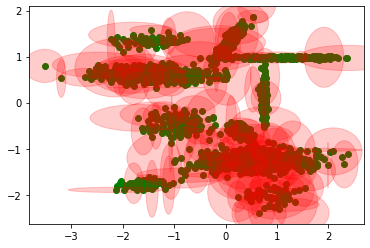

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73


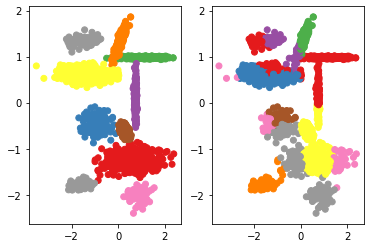

In [14]:
scaler = StandardScaler()

scaler.fit(X)
sdec_preds = sdec.differential_clustering(scaler.transform(X), y, N_ITER, crowding=True, smart_init=False, wait_on_plots=False)

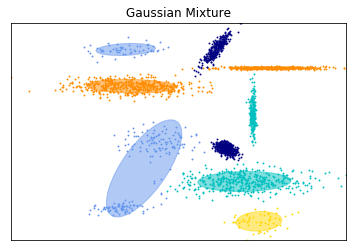

In [7]:
gm = em.gaussian_mixture(X, y)
em_preds = gm.predict(X)
em.plot_results(X, em_preds, gm.means_, gm.covariances_, 'Gaussian Mixture')

In [13]:
for alg, predictions in [('EM', em_preds), ('DEC', sdec_preds)]:
    print(f"Homogeneity score - {alg}:", metrics.homogeneity_score(y, predictions))
    print(f"Completeness score - {alg}:", metrics.completeness_score(y, predictions))
    print(f"V score - {alg}:", metrics.completeness_score(y, predictions))
    print(f"ARI - {alg}:", metrics.adjusted_rand_score(y, predictions))
    print("")

Homogeneity score - EM: 0.9687821963627379
Completeness score - EM: 0.9908495017582278
V score - EM: 0.9908495017582278
ARI - EM: 0.9826224357325907

Homogeneity score - DEC: 0.7901698244393103
Completeness score - DEC: 0.7791883308678059
V score - DEC: 0.7791883308678059
ARI - DEC: 0.7116927108256301



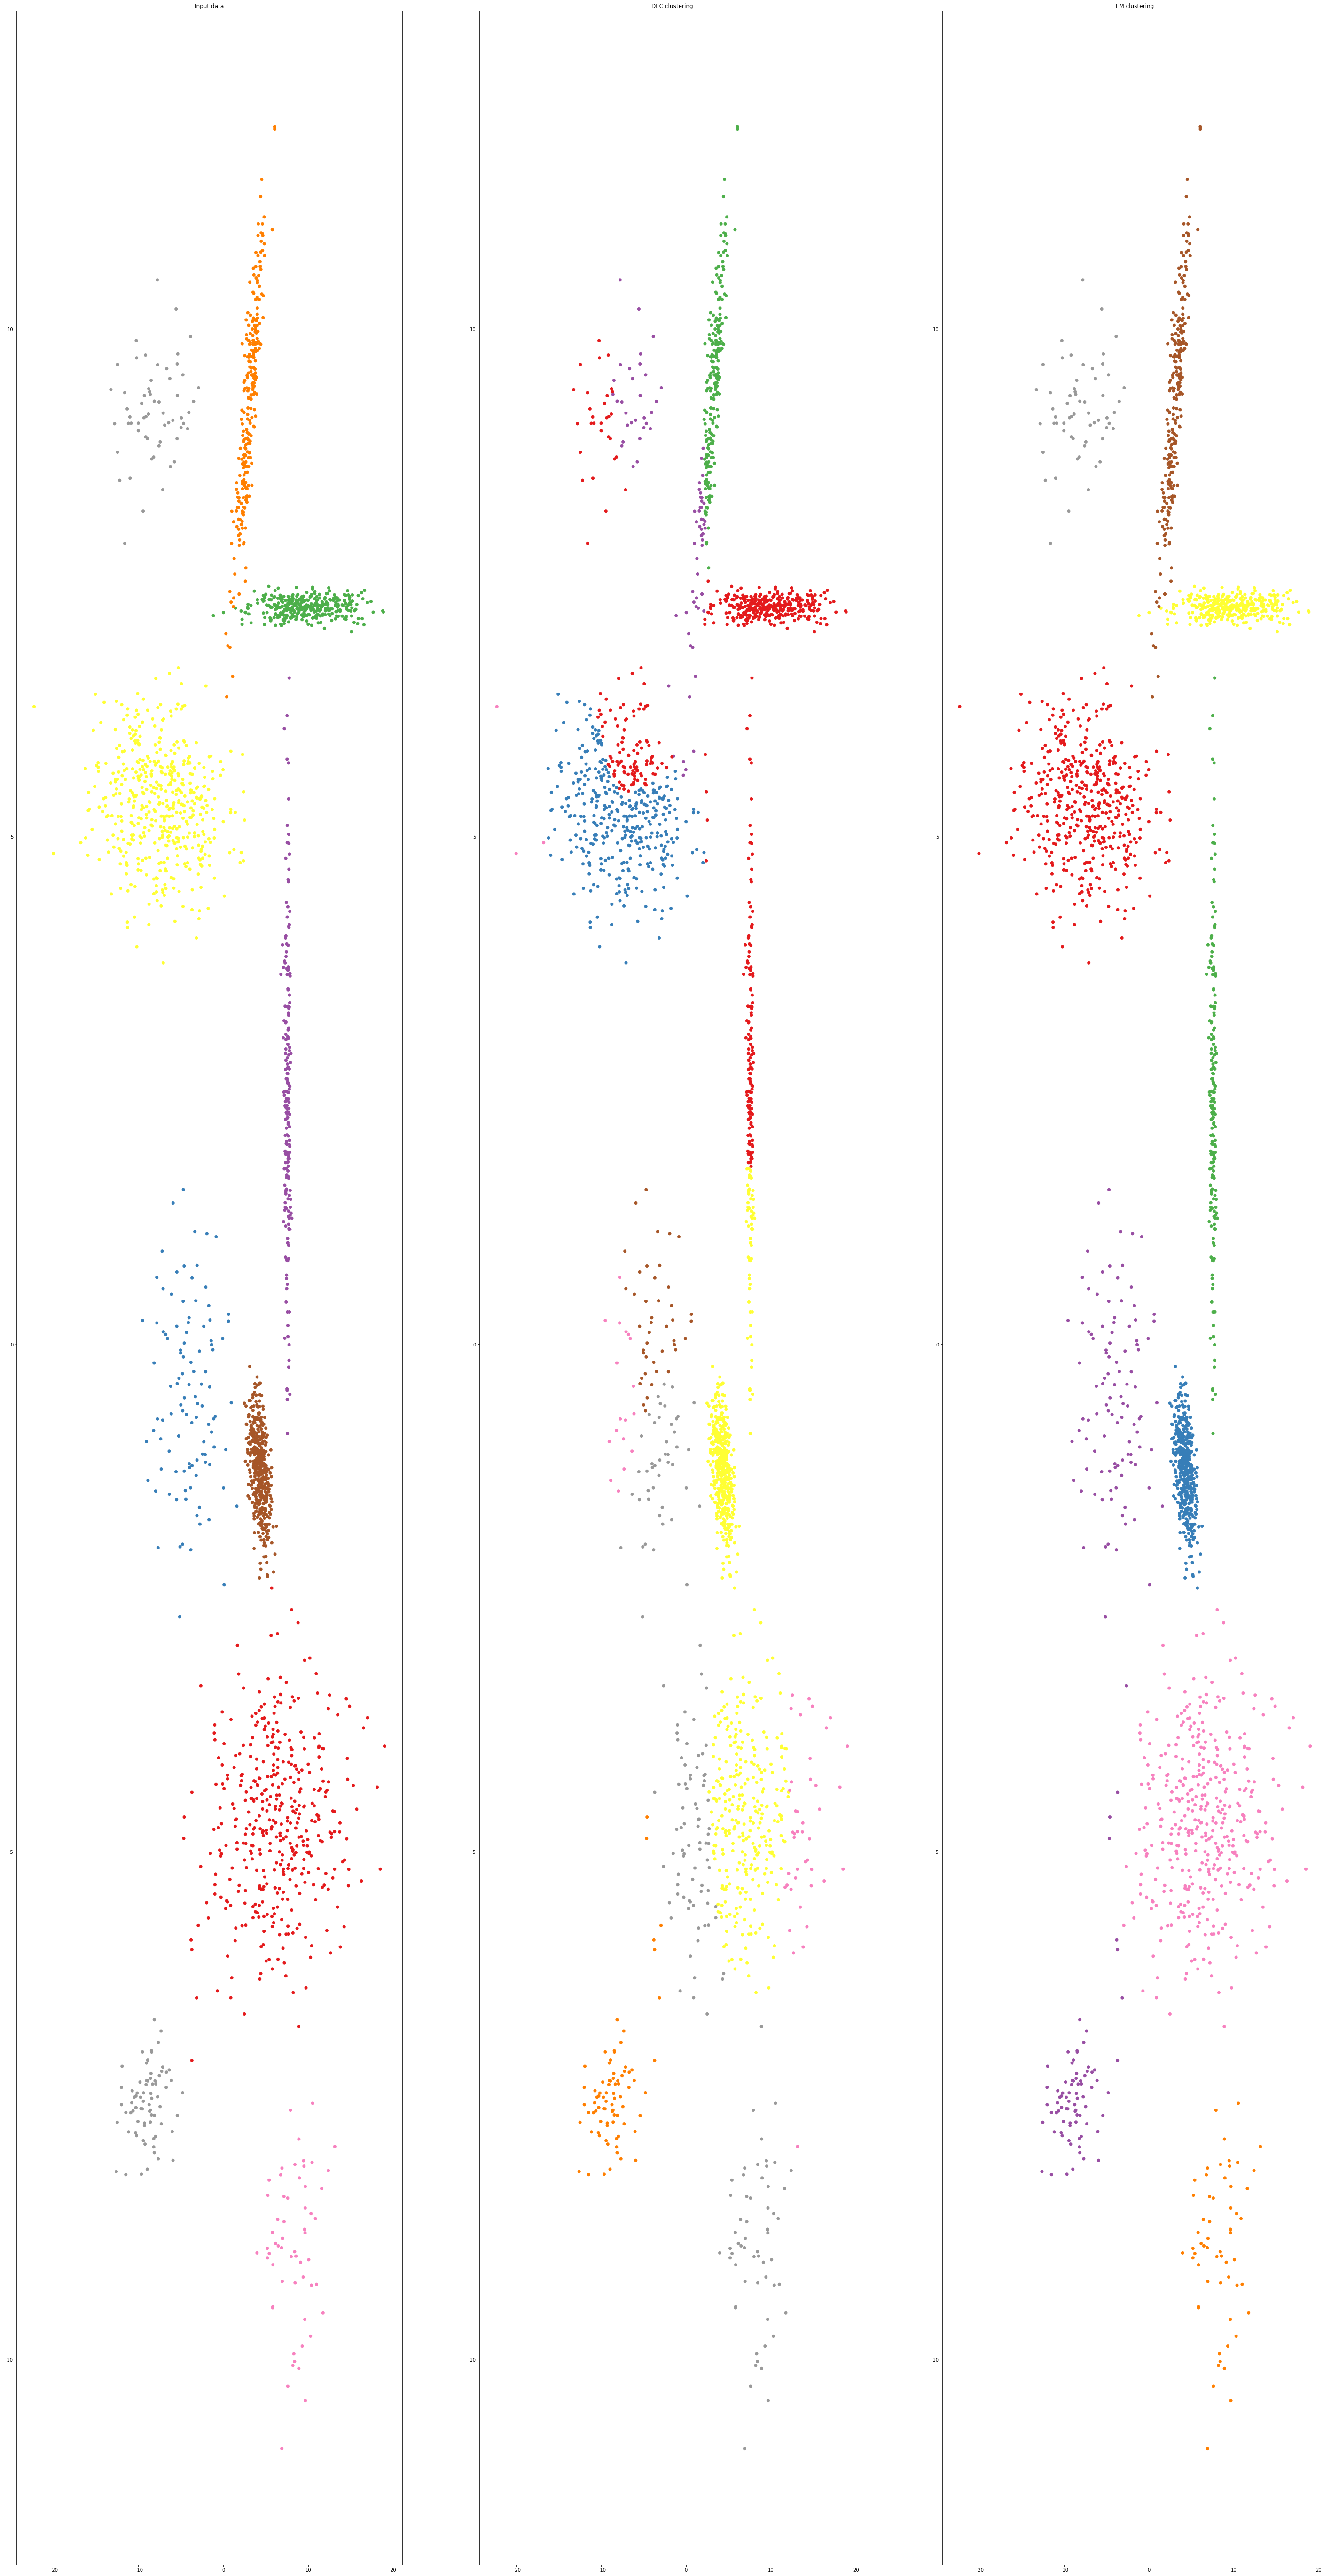

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(50,100))
axs[0].scatter(X[0], X[1], c=y, cmap='Set1')
axs[0].set_title('Input data')

axs[1].scatter(X[0], X[1], c=sdec_preds, cmap='Set1')
axs[1].set_title('DEC clustering')

axs[2].scatter(X[0], X[1], c=em_preds, cmap='Set1')
axs[2].set_title('EM clustering')

plt.show()
plt.close(fig)